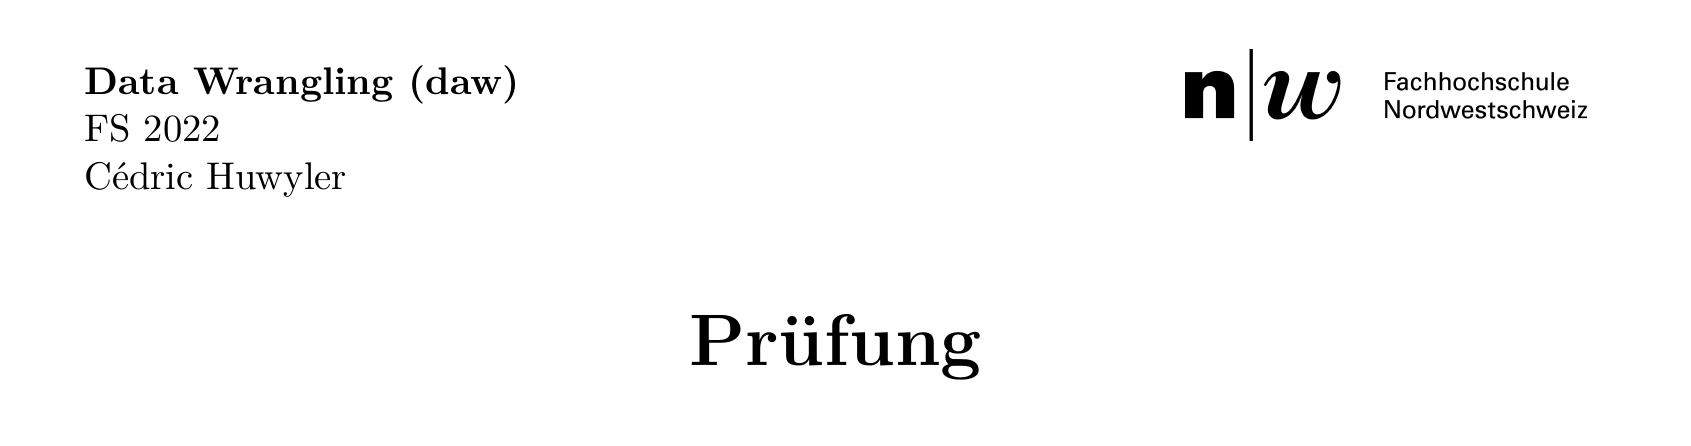

In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Benutzte Versionen:

In [286]:
pd.__version__

'2.2.0'

In [287]:
np.__version__

'1.23.3'

## Aufgabe 1 (27 Punkte)

Sie arbeiten bei einer Firma mit Kunden im Bankenbereich, die versucht, das Einkommen von Privatpersonen abzuschätzen um mögliche Kunden für den Private-Banking-Sektor zu identifizieren. Dazu beschaffen Sie sich die Lohnerhebungsdaten des Bundesamtes für Statistik und versuchen diese in eine Form zu bringen, die Sie dann später für Vorhersagen benutzen können. In dieser Aufgabe beginnen Sie Ihr Data Wrangling mit der Datei `Lohndaten_Grossregionen_BFS.xlsx`, die die Medianlöhne pro Grossregion der Schweiz und Wirtschaftszweig enthält und alle 2 Jahre erhoben wird.

### a) (7 Punkte)

Sichten Sie die Daten zum Jahr **2020** der Excel-Datei und lesen Sie diese dann in ein Dataframe ein. Das Data Frame soll die Spalten 'NOGA08' und 'Wirtschaftszweig' enthalten, gefolgt von den aufgeführten Grossregionen.

Benutzen Sie soviel Funktionalität der Einlese-Funktion wie möglich, schränken Sie insbesondere die einzulesenden Zeilen und Spalten geeignet ein und spezifizieren Sie Zeichenketten die für fehlende Werte stehen und automatisch mit `NaN` bzw. `NA` ersetzt werden können. Da das automatische Einlesen der Spaltenbezeichnungen zu kompliziert ist, definieren Sie diese manuell.

Da Ihre Pipeline später auch auf aktualiserten Daten mit dem Jahr 2022 funktionieren soll, verzichten Sie auf direkte Änderungen an der Excel-Datei und führen alle Operationen in Ihrem Data Wrangling - Framework aus.

In [288]:
df = pd.read_excel(
    "Lohndaten_BFS.xlsx", header=None, skiprows=6,
    usecols="C:J", sheet_name='2020'
)
df

,2,3,4,5,6,7,8,9
0,6665,6731,6600,6789,7113,6274,6585,5546
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6320,*,6115,-,*,*,*,-
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6475,6591,6301,7048,6885,6255,6443,5216
...,...,...,...,...,...,...,...,...
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
117,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
118,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [289]:

NOGA08 = pd.read_excel(
    "Lohndaten_BFS.xlsx", header=None, skiprows=8,
    usecols="A", sheet_name='2020'
)
NOGA08

,0
0,02
1,NaN
2,05-43
3,05-09
4,08
...,...
113,NaN
114,Quelle: BFS – Schweizerische Lohnstrukturerhebung
115,© BFS 2022
116,NaN


In [290]:

wirtschaftszweig = pd.read_excel(
    "Lohndaten_BFS.xlsx", header=None, skiprows=8,
    usecols="B", sheet_name='2020'
)
wirtschaftszweig

,1
0,Forstwirtschaft
1,NaN
2,SEKTOR 2 PRODUKTION
3,"Bergbau, Gewinnung v. Steinen u. Erden"
4,"Gewinnung v. Steinen/Erden, sonst. Bergbau"
...,...
113,NaN
114,NaN
115,NaN
116,NaN


In [291]:

grossregion =  pd.read_excel(
    "Lohndaten_BFS.xlsx", header=None, skiprows=3, nrows=2,
    usecols="C:J", sheet_name='2020'
)
grossregion

,2,3,4,5,6,7,8,9
0,Schweiz,Genfersee-,Espace,Nordwest-,Zürich,Ost-,Zentral-,Tessin
1,NaN,region,Mittelland,schweiz,NaN,schweiz,schweiz,NaN


###----------

In [292]:
df = pd.read_excel(
    "Lohndaten_BFS.xlsx", header=None, skiprows=8,
    usecols="A:J", sheet_name='2020', na_values=['*', '-']
)
df

,0,1,2,3,4,5,6,7,8,9
0,02,Forstwirtschaft,6320,NaN,6115,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05-43,SEKTOR 2 PRODUKTION,6475,6591,6301,7048,6885,6255,6443,5216
3,05-09,"Bergbau, Gewinnung v. Steinen u. Erden",6311,6279,6333,6594,[6139],6226,6716,6131
4,08,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6286,6230,6333,6594,[6125],6226,6550,6131
...,...,...,...,...,...,...,...,...,...,...
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Quelle: BFS – Schweizerische Lohnstrukturerhebung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,© BFS 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [293]:
df.columns=['NOGA08', 'Wirtschaftszweig', 'Schweiz', 'Genferseeregion', 'Espace Mittelland', 'Nordwestschweiz', 'Zürich', 'Ostschweiz', 'Zentralschweiz', 'Tessin']
df

,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin
0,02,Forstwirtschaft,6320,NaN,6115,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,05-43,SEKTOR 2 PRODUKTION,6475,6591,6301,7048,6885,6255,6443,5216
3,05-09,"Bergbau, Gewinnung v. Steinen u. Erden",6311,6279,6333,6594,[6139],6226,6716,6131
4,08,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6286,6230,6333,6594,[6125],6226,6550,6131
...,...,...,...,...,...,...,...,...,...,...
113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Quelle: BFS – Schweizerische Lohnstrukturerhebung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,© BFS 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
116,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [294]:
df.dropna(how='all', axis=0, inplace=True)
df

,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin
0,02,Forstwirtschaft,6320,NaN,6115,NaN,NaN,NaN,NaN,NaN
2,05-43,SEKTOR 2 PRODUKTION,6475,6591,6301,7048,6885,6255,6443,5216
3,05-09,"Bergbau, Gewinnung v. Steinen u. Erden",6311,6279,6333,6594,[6139],6226,6716,6131
4,08,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6286,6230,6333,6594,[6125],6226,6550,6131
5,09,Erbringung v. Dienstl. für den Bergbau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
110,NaN,NaN,statistisch unsicher),NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,1 Aufgrund wichtiger struktureller Veränderung...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Quelle: BFS – Schweizerische Lohnstrukturerhebung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,© BFS 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### b) (4 Punkte)

Die Lohndaten pro Grossregion sind nach Wirtschaftszweig unterteilt. Jeder Wirtschaftszweig ist nebst der Bezeichnung mit einem sogenannten NOGA08-Code codiert. Extrahieren Sie aus dem in Teilaufgabe a) eingelesenen Data Frame nur einzelne Wirtschafszweige mit einzelner NOGA-Code-Nummer, d.h. eliminieren Sie alle zusammenfassenden Gruppen (mit Bindestrich) oder Zeilen, wo kein numerischer NOGA08-Code vorliegt. Setzen Sie zum Schluss den Datentyp von 'NOGA08' auf Integer und stellen so sicher, dass Sie korrekt vorgegangen sind.

In [295]:
df['NOGA08'] = df['NOGA08'].astype(str)
df = df[~df.NOGA08.str.contains("-")]
df

,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin
0,02,Forstwirtschaft,6320,NaN,6115,NaN,NaN,NaN,NaN,NaN
4,08,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6286,6230,6333,6594,[6125],6226,6550,6131
5,09,Erbringung v. Dienstl. für den Bergbau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,Herstellung v. Nahrungs- u. Futtermitteln,5190,[5139],5165,5210,5303,5158,5405,4333
8,11,Getränkeherstellung,6194,5660,[5343],6250,6621,5699,6892,NaN
...,...,...,...,...,...,...,...,...,...,...
110,nan,NaN,statistisch unsicher),NaN,NaN,NaN,NaN,NaN,NaN,NaN
112,1 Aufgrund wichtiger struktureller Veränderung...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,Quelle: BFS – Schweizerische Lohnstrukturerhebung,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,© BFS 2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [296]:
df = df[df['Wirtschaftszweig'].notna()]
df

,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin
0,02,Forstwirtschaft,6320,NaN,6115,NaN,NaN,NaN,NaN,NaN
4,08,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6286,6230,6333,6594,[6125],6226,6550,6131
5,09,Erbringung v. Dienstl. für den Bergbau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,Herstellung v. Nahrungs- u. Futtermitteln,5190,[5139],5165,5210,5303,5158,5405,4333
8,11,Getränkeherstellung,6194,5660,[5343],6250,6621,5699,6892,NaN
...,...,...,...,...,...,...,...,...,...,...
91,92,"Spiel-, Wett- und Lotteriewesen",5667,[5646],5486,NaN,NaN,NaN,NaN,NaN
92,93,Sport und Erholung,6071,7091,6143,5570,[6623],5252,5256,4500
94,94,"Interessenvertretungen, relig. Verein.",7352,7622,7273,7088,7629,7321,7147,5922
95,95,Reparatur von Gebrauchsgütern,5703,5481,5985,[6281],5714,NaN,5614,3705


In [297]:
df['NOGA08'] = df['NOGA08'].astype(int)
df

C:\Users\denis\AppData\Local\Temp\ipykernel_8100\1727808837.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['NOGA08'] = df['NOGA08'].astype(int)


,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin
0,2,Forstwirtschaft,6320,NaN,6115,NaN,NaN,NaN,NaN,NaN
4,8,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6286,6230,6333,6594,[6125],6226,6550,6131
5,9,Erbringung v. Dienstl. für den Bergbau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10,Herstellung v. Nahrungs- u. Futtermitteln,5190,[5139],5165,5210,5303,5158,5405,4333
8,11,Getränkeherstellung,6194,5660,[5343],6250,6621,5699,6892,NaN
...,...,...,...,...,...,...,...,...,...,...
91,92,"Spiel-, Wett- und Lotteriewesen",5667,[5646],5486,NaN,NaN,NaN,NaN,NaN
92,93,Sport und Erholung,6071,7091,6143,5570,[6623],5252,5256,4500
94,94,"Interessenvertretungen, relig. Verein.",7352,7622,7273,7088,7629,7321,7147,5922
95,95,Reparatur von Gebrauchsgütern,5703,5481,5985,[6281],5714,NaN,5614,3705


### c) (4 Punkte)

Als nächstes setzen Sie den Datentyp aller Lohn-Zentralwerte auf `float` (bzw. `numeric` für R). Entfernen Sie dazu den Hinweis auf einen zu grossen Variationskoeffizienten der in einigen Lohnzahlen gesetzt ist (siehe Excel-Datei).

In [298]:
columNames = df.columns[2:]
columNames

Index(['Schweiz', 'Genferseeregion', 'Espace Mittelland', 'Nordwestschweiz',
       'Zürich', 'Ostschweiz', 'Zentralschweiz', 'Tessin'],
      dtype='object')

In [299]:
df[columNames] = df[columNames].astype(str)

C:\Users\denis\AppData\Local\Temp\ipykernel_8100\2289592438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columNames] = df[columNames].astype(str)


In [300]:
for column in columNames:
    df[column] = df[column].map(lambda x: x.lstrip('[').rstrip(']'))
df

C:\Users\denis\AppData\Local\Temp\ipykernel_8100\3723017967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = df[column].map(lambda x: x.lstrip('[').rstrip(']'))


,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin
0,2,Forstwirtschaft,6320,nan,6115,nan,nan,nan,nan,nan
4,8,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6286,6230,6333,6594,6125,6226,6550,6131
5,9,Erbringung v. Dienstl. für den Bergbau,nan,nan,nan,nan,nan,nan,nan,nan
7,10,Herstellung v. Nahrungs- u. Futtermitteln,5190,5139,5165,5210,5303,5158,5405,4333
8,11,Getränkeherstellung,6194,5660,5343,6250,6621,5699,6892,nan
...,...,...,...,...,...,...,...,...,...,...
91,92,"Spiel-, Wett- und Lotteriewesen",5667,5646,5486,nan,nan,nan,nan,nan
92,93,Sport und Erholung,6071,7091,6143,5570,6623,5252,5256,4500
94,94,"Interessenvertretungen, relig. Verein.",7352,7622,7273,7088,7629,7321,7147,5922
95,95,Reparatur von Gebrauchsgütern,5703,5481,5985,6281,5714,nan,5614,3705


In [301]:
df[columNames] = df[columNames].astype(float)

C:\Users\denis\AppData\Local\Temp\ipykernel_8100\1382768803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[columNames] = df[columNames].astype(float)


### d) (3 Punkte)

 Erzeugen Sie nun aus dem Resultat von Teilaufgabe c) eine Tabelle mit folgenden Spalten: *'NOGA08', 'Wirtschaftszweig', 'Grossregion', 'Zentralwert'*

In [302]:
df = pd.melt(df, value_vars=columNames, id_vars=['NOGA08', 'Wirtschaftszweig'])
df

,NOGA08,Wirtschaftszweig,variable,value
0,2,Forstwirtschaft,Schweiz,6320.0
1,8,"Gewinnung v. Steinen/Erden, sonst. Bergbau",Schweiz,6286.0
2,9,Erbringung v. Dienstl. für den Bergbau,Schweiz,NaN
3,10,Herstellung v. Nahrungs- u. Futtermitteln,Schweiz,5190.0
4,11,Getränkeherstellung,Schweiz,6194.0
...,...,...,...,...
635,92,"Spiel-, Wett- und Lotteriewesen",Tessin,NaN
636,93,Sport und Erholung,Tessin,4500.0
637,94,"Interessenvertretungen, relig. Verein.",Tessin,5922.0
638,95,Reparatur von Gebrauchsgütern,Tessin,3705.0


### e) (5 Punkte)

In der Excel-Datei finden sich auch Daten zum Jahr 2018. Da das Format ziemlich ähnlich aussieht wie dasjenige von 2020, schreiben Sie eine Funktion `read_salaries( excel_file, year )`, die Ihnen alle Schritte aus den Teilaufgaben a)-d) hintereinander ausführt und das resultierende Data Frame zurückgibt.

Lesen Sie mit dieser Funktion die Daten von 2020 und 2018 ein, definieren Sie jeweils eine Spalte 'Jahr' und setzen Sie die beiden Datensätze zu einem einzigen Data Frame zusammen.

In [303]:
def read_salaries(excel_file:str, year:int, wide_to_long=True):
    df = pd.read_excel(
    excel_file, header=None, skiprows=8,
    usecols="A:J", sheet_name=f'{year}', na_values=['*', '-'])
    df.columns = ['NOGA08', 'Wirtschaftszweig', 'Schweiz', 'Genferseeregion', 'Espace Mittelland', 'Nordwestschweiz',
                  'Zürich', 'Ostschweiz', 'Zentralschweiz', 'Tessin']
    df.dropna(how='all', axis=0, inplace=True)
    df['NOGA08'] = df['NOGA08'].astype(str)
    df = df[~df.NOGA08.str.contains("-")]
    df = df[df['Wirtschaftszweig'].notna()]
    df['NOGA08'] = df['NOGA08'].astype(int)
    columNames = df.columns[2:]
    df[columNames] = df[columNames].astype(str)
    for column in columNames:
        df[column] = df[column].map(lambda x: x.lstrip('[').rstrip(']'))
    df[columNames] = df[columNames].astype(float)
    if wide_to_long:
        df = pd.melt(df, value_vars=columNames, id_vars=['NOGA08', 'Wirtschaftszweig'])
    df['Jahr'] = year
    return df

In [304]:
salaries_2018 = read_salaries('Lohndaten_BFS.xlsx', 2018)
salaries_2020 = read_salaries('Lohndaten_BFS.xlsx', 2020)

In [305]:
combined_df = pd.concat([salaries_2018, salaries_2020], ignore_index=True)
combined_df

,NOGA08,Wirtschaftszweig,variable,value,Jahr
0,2,Forstwirtschaft,Schweiz,7129.0,2018
1,8,"Gewinnung v. Steinen/Erden, sonst. Bergbau",Schweiz,6207.0,2018
2,9,Erbringung v. Dienstl. für den Bergbau,Schweiz,NaN,2018
3,10,Herstellung v. Nahrungs- u. Futtermitteln,Schweiz,5212.0,2018
4,11,Getränkeherstellung,Schweiz,6000.0,2018
...,...,...,...,...,...
1275,92,"Spiel-, Wett- und Lotteriewesen",Tessin,NaN,2020
1276,93,Sport und Erholung,Tessin,4500.0,2020
1277,94,"Interessenvertretungen, relig. Verein.",Tessin,5922.0,2020
1278,95,Reparatur von Gebrauchsgütern,Tessin,3705.0,2020


### f) (4 Punkte)

In welchem Wirtschaftszweig haben die Angestellten schweizweit zwischen 2018 und 2020 die stärkste Lohnzunahme bzw. die stärkste Lohnabnahme erfahren? Berücksichtigen Sie die Tabakindustrie entsprechend der Bemerkung in Fussnote 1 der Excel-Datei nicht.

**Hinweis:** Hier kann es Sinn machen, Ihrer Funktion  aus e) ein Argument `wide_to_long=False` hinzuzufügen.

In [306]:
salaries_2018 = read_salaries('Lohndaten_BFS.xlsx', 2018, False)
salaries_2020 = read_salaries('Lohndaten_BFS.xlsx', 2020, False)

In [307]:

salaries_2018['meanOfWirtschaftszweig_2018'] = salaries_2018[['Schweiz', 'Genferseeregion', 'Espace Mittelland', 'Nordwestschweiz', 'Zürich', 'Ostschweiz', 'Zentralschweiz', 'Tessin']].mean(skipna=True, axis=1)
salaries_2020['meanOfWirtschaftszweig_2020'] = salaries_2020[['Schweiz', 'Genferseeregion', 'Espace Mittelland', 'Nordwestschweiz', 'Zürich', 'Ostschweiz', 'Zentralschweiz', 'Tessin']].mean(skipna=True, axis=1)

combined_df = pd.concat([salaries_2018, salaries_2020], axis=1, ignore_index=False)
combined_df

,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin,...,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin,Jahr,meanOfWirtschaftszweig_2020
0,2,Forstwirtschaft,7129.0,NaN,NaN,NaN,NaN,7129.0,NaN,NaN,...,6320.0,NaN,6115.0,NaN,NaN,NaN,NaN,NaN,2020,6217.500000
4,8,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6207.0,6125.0,6312.0,6393.0,NaN,6163.0,6134.0,NaN,...,6286.0,6230.0,6333.0,6594.0,6125.0,6226.0,6550.0,6131.0,2020,6309.375000
5,9,Erbringung v. Dienstl. für den Bergbau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN
7,10,Herstellung v. Nahrungs- u. Futtermitteln,5212.0,5571.0,5046.0,5188.0,5353.0,4989.0,5608.0,4230.0,...,5190.0,5139.0,5165.0,5210.0,5303.0,5158.0,5405.0,4333.0,2020,5112.875000
8,11,Getränkeherstellung,6000.0,5573.0,5608.0,6609.0,6381.0,5778.0,NaN,NaN,...,6194.0,5660.0,5343.0,6250.0,6621.0,5699.0,6892.0,NaN,2020,6094.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,"Spiel-, Wett- und Lotteriewesen",5848.0,NaN,5545.0,NaN,NaN,5710.0,NaN,NaN,...,5667.0,5646.0,5486.0,NaN,NaN,NaN,NaN,NaN,2020,5599.666667
92,93,Sport und Erholung,6183.0,7392.0,6190.0,5439.0,6836.0,4762.0,5089.0,4416.0,...,6071.0,7091.0,6143.0,5570.0,6623.0,5252.0,5256.0,4500.0,2020,5813.250000
94,94,"Interessenvertretungen, relig. Verein.",7335.0,7741.0,7222.0,7333.0,7564.0,7219.0,6955.0,5741.0,...,7352.0,7622.0,7273.0,7088.0,7629.0,7321.0,7147.0,5922.0,2020,7169.250000
95,95,Reparatur von Gebrauchsgütern,5779.0,5733.0,5585.0,6401.0,6010.0,5156.0,6261.0,3951.0,...,5703.0,5481.0,5985.0,6281.0,5714.0,NaN,5614.0,3705.0,2020,5497.571429


In [308]:
combined_df['diff_years'] = combined_df['meanOfWirtschaftszweig_2018']-combined_df['meanOfWirtschaftszweig_2020']
combined_df

,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin,...,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin,Jahr,meanOfWirtschaftszweig_2020,diff_years
0,2,Forstwirtschaft,7129.0,NaN,NaN,NaN,NaN,7129.0,NaN,NaN,...,NaN,6115.0,NaN,NaN,NaN,NaN,NaN,2020,6217.500000,911.500000
4,8,"Gewinnung v. Steinen/Erden, sonst. Bergbau",6207.0,6125.0,6312.0,6393.0,NaN,6163.0,6134.0,NaN,...,6230.0,6333.0,6594.0,6125.0,6226.0,6550.0,6131.0,2020,6309.375000,-87.041667
5,9,Erbringung v. Dienstl. für den Bergbau,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020,NaN,NaN
7,10,Herstellung v. Nahrungs- u. Futtermitteln,5212.0,5571.0,5046.0,5188.0,5353.0,4989.0,5608.0,4230.0,...,5139.0,5165.0,5210.0,5303.0,5158.0,5405.0,4333.0,2020,5112.875000,36.750000
8,11,Getränkeherstellung,6000.0,5573.0,5608.0,6609.0,6381.0,5778.0,NaN,NaN,...,5660.0,5343.0,6250.0,6621.0,5699.0,6892.0,NaN,2020,6094.142857,-102.642857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,92,"Spiel-, Wett- und Lotteriewesen",5848.0,NaN,5545.0,NaN,NaN,5710.0,NaN,NaN,...,5646.0,5486.0,NaN,NaN,NaN,NaN,NaN,2020,5599.666667,101.333333
92,93,Sport und Erholung,6183.0,7392.0,6190.0,5439.0,6836.0,4762.0,5089.0,4416.0,...,7091.0,6143.0,5570.0,6623.0,5252.0,5256.0,4500.0,2020,5813.250000,-24.875000
94,94,"Interessenvertretungen, relig. Verein.",7335.0,7741.0,7222.0,7333.0,7564.0,7219.0,6955.0,5741.0,...,7622.0,7273.0,7088.0,7629.0,7321.0,7147.0,5922.0,2020,7169.250000,-30.500000
95,95,Reparatur von Gebrauchsgütern,5779.0,5733.0,5585.0,6401.0,6010.0,5156.0,6261.0,3951.0,...,5481.0,5985.0,6281.0,5714.0,NaN,5614.0,3705.0,2020,5497.571429,111.928571


In [309]:
combined_df.iloc[[np.argmax(combined_df.diff_years)]]

,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin,...,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin,Jahr,meanOfWirtschaftszweig_2020,diff_years
0,2,Forstwirtschaft,7129.0,NaN,NaN,NaN,NaN,7129.0,NaN,NaN,...,NaN,6115.0,NaN,NaN,NaN,NaN,NaN,2020,6217.5,911.5


In [310]:
combined_df = combined_df.reindex()

In [311]:
temp = combined_df[combined_df.index != 9]
temp.iloc[[np.argmin(temp.diff_years)]]

,NOGA08,Wirtschaftszweig,Schweiz,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin,...,Genferseeregion,Espace Mittelland,Nordwestschweiz,Zürich,Ostschweiz,Zentralschweiz,Tessin,Jahr,meanOfWirtschaftszweig_2020,diff_years
59,61,Telekommunikation,8843.0,7030.0,9050.0,6588.0,9229.0,NaN,7000.0,5484.0,...,7444.0,9588.0,6483.0,9354.0,6416.0,8336.0,NaN,2020,8117.285714,-513.857143


## Aufgabe 2 (27 Punkte)


Sie arbeiten bei einer Firma im Lebensmittelbereich und haben den Auftrag, ein Recommender-System aufzusetzen. Ihre Vorgesetzte empfiehlt Ihnen, sich zum Aufwärmen mal ein etwas einfacheres Datenset mit Film-Bewertungen zu untersuchen. Das Datenset ist auf dem SQL-Server der Firma bereits verfügbar, damit Sie sich aber nicht mit der Verbindung herumschlagen müssen, überreicht sie Ihnen die Datenbank als `sqlite3`-Datei. Dort stecken die Tabellen `movies` (Details der einzelnen Filme) und `ratings` (Bewertungen durch die User des Systems).
In dieser Aufgabe bereiten Sie das Datenset etwas auf.


**Hinweis:** Falls Sie eine der Teilaufgaben b)-d) nicht vollständig schaffen, können Sie trotzdem mit Teilaufgabe d) weitermachen.


### a) (6 Punkte)

 Lesen Sie die Tabellen `movies` und `ratings` aus der beigelegten Datei `movie_data.sqlite` ein und geben Sie die ersten paar Zeilen beider Data Frames aus. Die Spaltennamen sind selbsterklärend. Stellen Sie sicher, dass die Felder `movieId`, `userId` und `timestamp` den Integer-Datentyp haben und dass `rating` als Float vorliegt.

In [312]:
import sqlite3 as lite

con = lite.connect('movie_data.sqlite')

df_movies = pd.read_sql('select * from movies', con=con)
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [313]:
df_ratings = pd.read_sql('select * from ratings', con=con)
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [314]:
def set_dtype_inplace(df, column:str, dtype):
	df[column] = df[column].astype(dtype)
    
set_dtype_inplace(df_movies, 'movieId', int)
set_dtype_inplace(df_ratings, 'movieId', int)
set_dtype_inplace(df_ratings, 'userId', int)
set_dtype_inplace(df_ratings, 'timestamp', int)
set_dtype_inplace(df_ratings, 'rating', float)


In [315]:
df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [316]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


### b) (6 Punkte)

 Bringen Sie Filmtitel und Jahr in der Spalte `title` in `movies` in zwei separate Spalten `title` und `year`, entfernen Sie insbesondere auch die Klammern um das Jahr und setzen Sie den Datentyp von `year` auf Float. 

Prüfen Sie, ob Sie mit Ihrem Ansatz alle Zeilen im Datensatz korrekt bearbeitet haben, indem Sie `year` auf fehlende Werte prüfen. Sie sollten nicht mehr als 13 fehlende Werte finden.

**Hinweis:** Hier könnte die Verwendung von regulären Ausdrücken Sinn machen.

In [317]:
df_movies['year'] = df_movies['title'].str.extract(r'\(([0-9][0-9][0-9][0-9])\)')
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,2017
9739,193585,Flint (2017),Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,2018


In [318]:
#df_movies['title'].str.extract(r'.+?(?=\([0-9]{4}\))')

In [319]:
df_movies['title'] = df_movies['title'].map(lambda x: x.split('(')[0].strip())
df_movies

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,2017
9738,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,2017
9739,193585,Flint,Drama,2017
9740,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,2018


In [320]:
df_movies['year'].isna().sum()

13

### c) (3 Punkte)

Sie interessieren sich dafür, wie die Ratings zeitlich getätigt wurden. Erstellen Sie dazu in `ratings` ein Feld `date`, das das Feld `timestamp` als Datumsformat in der Form `'DD.MM.YYYY hh:mm:ss'` repräsentiert. Visualieren Sie die Anzahl der getätigten Ratings pro Jahr mit einem Histogramm.

**Hinweis:** Der Timestamp liegt in Unix-Epochen in Sekunden seit dem 1.1.1970 vor.

In [321]:
df_ratings['date'] = pd.to_datetime(df_ratings.timestamp, unit='s')
df_ratings

,userId,movieId,rating,timestamp,date
0,1,1,4.0,964982703,2000-07-30 18:45:03
1,1,3,4.0,964981247,2000-07-30 18:20:47
2,1,6,4.0,964982224,2000-07-30 18:37:04
3,1,47,5.0,964983815,2000-07-30 19:03:35
4,1,50,5.0,964982931,2000-07-30 18:48:51
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,2017-05-03 21:53:22
100832,610,168248,5.0,1493850091,2017-05-03 22:21:31
100833,610,168250,5.0,1494273047,2017-05-08 19:50:47
100834,610,168252,5.0,1493846352,2017-05-03 21:19:12


In [322]:
df_ratings['date'] = df_ratings['date'].dt.strftime('%d.%m.%Y %H:%M:%S')
df_ratings

,userId,movieId,rating,timestamp,date
0,1,1,4.0,964982703,30.07.2000 18:45:03
1,1,3,4.0,964981247,30.07.2000 18:20:47
2,1,6,4.0,964982224,30.07.2000 18:37:04
3,1,47,5.0,964983815,30.07.2000 19:03:35
4,1,50,5.0,964982931,30.07.2000 18:48:51
...,...,...,...,...,...
100831,610,166534,4.0,1493848402,03.05.2017 21:53:22
100832,610,168248,5.0,1493850091,03.05.2017 22:21:31
100833,610,168250,5.0,1494273047,08.05.2017 19:50:47
100834,610,168252,5.0,1493846352,03.05.2017 21:19:12


In [ ]:
import seaborn as sns
sns.histplot(df_ratings)

### d) (8 Punkte)

Im Folgenden möchten wir einige Fragen beantworten. Erstellen Sie dazu explizit ein neues Data Frame, in dem Sie zu `ratings` zusätzlich noch den Filmtitel und das Jahr hinzufügen. Benutzen Sie einen geeigneten Join, der sicherstellt dass keine nicht-gerateten Filme verloren gehen und entsprechend ein `NaN` bzw. `NA` bei fehlenden Ratings setzt.

Machen Sie anschliessend eine kurze Statistik auf dem erstellten Data Frame und beantworten Sie folgende Fragen:

1. Wie ist der Wertebereich der Ratings?

In [323]:
df_combined = pd.DataFrame()
year_title = df_movies[['movieId', 'title', 'year']]

In [324]:
df_combined['rating_min'] = df_ratings.groupby('movieId').rating.min()
df_combined['rating_max'] = df_ratings.groupby('movieId').rating.max()
df_combined = df_combined.join(year_title, on='movieId', how='left')
df_combined

,rating_min,rating_max,movieId,title,year
movieId,,,,,
1,0.5,5.0,1,Jumanji,1995
2,0.5,5.0,2,Grumpier Old Men,1995
3,0.5,5.0,3,Waiting to Exhale,1995
4,1.0,3.0,4,Father of the Bride Part II,1995
5,0.5,5.0,5,Heat,1995
...,...,...,...,...,...
193581,4.0,4.0,193581,NaN,NaN
193583,3.5,3.5,193583,NaN,NaN
193585,3.5,3.5,193585,NaN,NaN


2. Für welchen Film existieren am meisten Ratings?

In [337]:
df_combined = pd.DataFrame()
year_title = df_movies[['movieId', 'title', 'year']]

In [338]:
df_combined['max_rating_count'] = df_ratings.groupby('movieId').rating.count()
#df_combined['rating_max'] = df_ratings.groupby('movieId').rating.max()
df_combined = df_combined.join(year_title, on='movieId', how='left')
df_combined.iloc[[np.argmax(df_combined.max_rating_count)]]

,max_rating_count,movieId,title,year
movieId,,,,
356,329,356,"Age of Innocence, The",1993


3. Kann ein einzelner User einen Film mehrmals raten?

In [347]:
df_combined = pd.DataFrame()
year_title = df_movies[['movieId', 'title', 'year']]
df_combined['count_by_user_and_movie'] = df_ratings.groupby(['movieId', 'userId']).rating.count()
df_combined = df_combined.join(year_title, on='movieId', how='left')
df_combined.iloc[[np.argmax(df_combined.count_by_user_and_movie)]]

,,count_by_user_and_movie,movieId,title,year
movieId,userId,,,,
1,1,1,1,Jumanji,1995


4. Wieviele Prozent der Filme wurden mindestens einmal gerated? Wieviele nie?

In [372]:
df_combined = pd.DataFrame()
year_title = df_movies[['movieId', 'title', 'year']]

In [373]:
df_combined['Rated_Movies_Percentage'] = 
df_combined = df_combined.join(year_title, on='movieId', how='left')

KeyError: 'movieId'

In [374]:
df_combined

,Rated_Movies_Percentage
userId,100836
movieId,100836
rating,100836
timestamp,100836
date,100836


### e) (4 Punkte)

Nun soll die sogenannte `User-Item-Matrix` erstellt werden. Diese Matrix soll als Zeilen die User IDs und als Spalten die Movie IDs enthalten und als Matrixelemente das von User `userId` für den Film `movieId` getätigte Rating.
Stellen Sie sicher, dass fehlende Ratings auf 0 gesetzt sind.

In [377]:
df_combined = pd.DataFrame()
year_title = df_movies[['movieId', 'title', 'year']]

df_combined = df_ratings.join(year_title, on='movieId', how='left', lsuffix='_left')

df_combined

,userId,movieId_left,rating,timestamp,date,movieId,title,year
0,1,1,4.0,964982703,30.07.2000 18:45:03,2.0,Jumanji,1995
1,1,3,4.0,964981247,30.07.2000 18:20:47,4.0,Waiting to Exhale,1995
2,1,6,4.0,964982224,30.07.2000 18:37:04,7.0,Sabrina,1995
3,1,47,5.0,964983815,30.07.2000 19:03:35,52.0,Mighty Aphrodite,1995
4,1,50,5.0,964982931,30.07.2000 18:48:51,55.0,Georgia,1995
...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,03.05.2017 21:53:22,NaN,NaN,NaN
100832,610,168248,5.0,1493850091,03.05.2017 22:21:31,NaN,NaN,NaN
100833,610,168250,5.0,1494273047,08.05.2017 19:50:47,NaN,NaN,NaN
100834,610,168252,5.0,1493846352,03.05.2017 21:19:12,NaN,NaN,NaN
